  
 Universidade Federal do Piaui                     
 Campus Ministro Petronio Portela                    
 Copyright 2022 -José Borges do Carmo Neto-          
 @author José Borges do Carmo Neto                   
 @email jose.borges90@hotmail.com                    
Simulation cilindrical tank                        
                                                     
  -- Version: 1.0  - 10/05/2022                      


In [59]:
# library import

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [60]:
#Dados do probelma:

Cv = 0.97 #velocity coefficient (water 0.97)
Cc = 0.97 #contraction coefficient (sharp edge aperture 0.62, well rounded aperture 0.97)

Cd = Cc*Cv # discharge coefficient

r = 0.01;# raio do orificio de saida em metros

A = math.pi*r**2;# Area do orificio de saida


In [73]:
#modeling

def cilindrical_tank_nl(y,t,A,Qin,Cd):
    import math
    # calculate derivative of the Level
    
    g = 9.81;
    R = 0.042; # Radio meters
    
    b = A*Cd*math.sqrt(2*g);
    
    k1 = 1/(math.pi*(R)**2);
    k2 = b/(math.pi*(R)**2);


    dh_dt = Qin*k1 - k2*y**(1/2);

    return dh_dt

def conical_tank_nl(t,y,A,Qin,Cd):
    import math
    # calculate derivative of the Level
    
    g = 9.81;
    R = 0.042; # Radio meters
    H = 0.70
    R1 = 0.042; # Raio em metros
    R2 = 0.01; # Raio da base do cilindro
    
    b = A*Cd*math.sqrt(2*g);
    
    dh_dt = (Qin - b*y**(1/2))/(R2 + ((R1-R2)/H)*y)**(2);

    return dh_dt

In [68]:
# initial condition
h0 = .01
Ts = 5; # periodo de amostragem para processo de um tanque ( Landau,2006)
Tsim = 150
# number of time points
nptos = int(Tsim/Ts);
# time points
ts = np.linspace(0,Tsim,nptos);

# step input
for i in range(nptos):
    if i<=nptos/3: u[i]= 0.0010
    if i>nptos/3 and i<=2*nptos/3: u[i] = 0.0012
    if i> 2*nptos/3: u[i] = 0.0015

# store solution

h = np.empty_like(ts)
# record initial conditions
h[0] = h0


In [69]:
# Solve ODE:

for i in range(1,nptos):
    # span for next time step
    tspan = [ts[i-1],ts[i]]
    # solve for next step
    y = odeint(cilindrical_tank_nl,h0,tspan,args=(A,u[i],Cd,))

    h[i] = y[1]
    h0 = y[1]


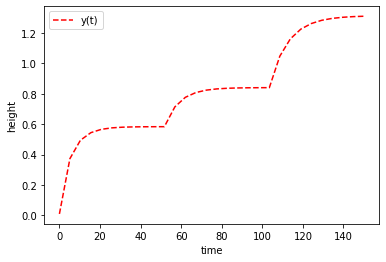

In [71]:
# plot results
#plt.plot(ts,u,'g:',label='u(t)')
#plt.plot(ts,x,'b-',label='x(t)')
plt.plot(ts,h,'r--',label='y(t)')
plt.ylabel('height')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


In [74]:
# Solve ODE:

for i in range(1,nptos):
    # span for next time step
    tspan = [ts[i-1],ts[i]]
    # solve for next step
    y = odeint(conical_tank_nl,h0,tspan,args=(A,u[i],Cd,))

    h[i] = y[1]
    h0 = y[1]

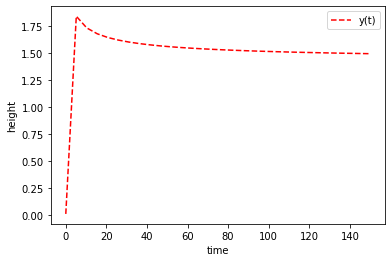

In [75]:
# plot results
#plt.plot(ts,u,'g:',label='u(t)')
#plt.plot(ts,x,'b-',label='x(t)')
plt.plot(ts,h,'r--',label='y(t)')
plt.ylabel('height')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
